## Epsilon Greedy Selection

This demo examines the tradeoff between Exploration and Exploitation. To have a better control, we use a custom implementation of a Multi Armed Bandit that acts similar to Gym environments. 

In [21]:
import gym
import numpy as np
import random
from matplotlib import pyplot as plot
%matplotlib inline

In [22]:
from multi_armed_bandit import MultiArmedBandit

In [23]:
def create_bandit(reward_dist):
    if abs(sum(reward_dist )-1 ) > 0.1e-2:
        print("Adjust the reward distribution to sum to one..")
    env = MultiArmedBandit(reward_probability_dist=reward_distribution)
    num_arms= len(reward_distribution)
    return env,num_arms




Here, we can control the number of bandits and their  behaviour. Below, we have defined a 10 armed Bandit and the 4th Bandit is the best one. The Agent doesnt know this detail and it has to discover it by interacting with the environment. Note that the probability needs to sum to one . 

In [24]:
tot_episodes=200
tot_steps =1000
reward_distribution = [0.1,0.05,0.05,0.4,0.3,0.02,0.03,0.01,0.01,0.03]
env,tot_arms = create_bandit(reward_distribution)
tot_arms = len(reward_distribution)
print(tot_arms)


10


In [25]:
def perform_random_multiarm_bandit():
    

    average_value_function = np.zeros(tot_arms)
    cumulated_reward_list = list()


    for episode in range(tot_episodes):
        cumulated_reward = 0
        reward_counter_array = np.zeros(tot_arms)
        action_counter_array = np.full(tot_arms, 1.0e-5)
        for step in range(tot_steps):
            action = np.random.randint(low=0, high=tot_arms)
            #print(action)
            reward = env.step(action)
            reward_counter_array[action] += reward
            action_counter_array[action] += 1
            cumulated_reward += reward
        cumulated_reward_list.append(cumulated_reward)
        value_function = np.true_divide(reward_counter_array, action_counter_array)
        average_value_function += value_function
    return average_value_function,cumulated_reward_list,action_counter_array




In [26]:
random_average_value_fn ,random_rewards,random_actions = perform_random_multiarm_bandit()

print(np.mean(random_rewards))
#print(random_actions)

100.245


Text(0, 0.5, 'Count')

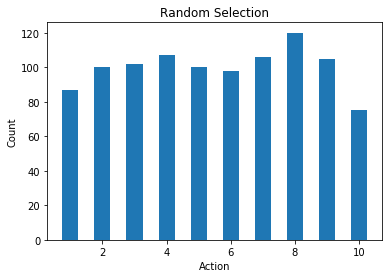

In [27]:

plot.title("Random Selection")
plot.bar(range(1,tot_arms+1),random_actions,width =0.5)
plot.xlabel('Action')
plot.ylabel('Count')


In [28]:
def return_greedy_action(reward_counter_array):
    amax = np.amax(reward_counter_array)
    indices = np.where(reward_counter_array == amax)[0]
    action = np.random.choice(indices)
    return action


In [29]:
def perform_greedy_multiarm_bandit():

    average_value_function = np.zeros(tot_arms)
    cumulated_reward_list = list()
    epsilon = 0.1

    for episode in range(tot_episodes):
        cumulated_reward = 0
        reward_counter_array = np.zeros(tot_arms)
        action_counter_array = np.full(tot_arms, 1.0e-5)
        for step in range(tot_steps):
            action = return_greedy_action(reward_counter_array)
            reward = env.step(action)
            reward_counter_array[action] += reward
            action_counter_array[action] += 1
            cumulated_reward += reward
        cumulated_reward_list.append(cumulated_reward)
        value_function = np.true_divide(reward_counter_array, action_counter_array)
        average_value_function += value_function
    return average_value_function,cumulated_reward_list,action_counter_array

In [30]:
greedy_average_value_fn,greedy_rewards,greedy_actions = perform_greedy_multiarm_bandit()

Text(0, 0.5, 'Count')

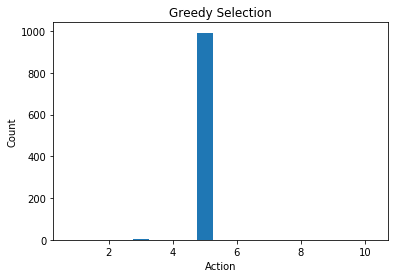

In [31]:


plot.title("Greedy Selection")
plot.bar(range(1,tot_arms+1),greedy_actions,width =0.5)
plot.xlabel('Action')
plot.ylabel('Count')

In Epsilon Greedy method, Epsilon  determines the trade off between Exploration and Exploitation. Let us perform the same experiment with different epsilon values.

In [32]:
def return_epsilon_greedy_action(epsilon, reward_counter_array):
    
    tot_actions = reward_counter_array.shape[0]
    if random.uniform(0, 1) <= epsilon:
        action = np.random.randint(low=0, high=tot_actions)
    else:
        amax = np.amax(reward_counter_array)
        indices = np.where(reward_counter_array == amax)[0]
        action = np.random.choice(indices)
    return action

In [33]:
def perform_epsilon_greedy_multiarm_bandit(epsilon=0.1):

    average_value_function = np.zeros(tot_arms)
    cumulated_reward_list = list()
    

    for episode in range(tot_episodes):
        cumulated_reward = 0
        reward_counter_array = np.zeros(tot_arms)
        action_counter_array = np.full(tot_arms, 1.0e-5)
        for step in range(tot_steps):

            action = return_epsilon_greedy_action(epsilon, np.true_divide(reward_counter_array, action_counter_array))
            reward = env.step(action)
            reward_counter_array[action] += reward
            action_counter_array[action] += 1
            cumulated_reward += reward
        cumulated_reward_list.append(cumulated_reward)
        value_function = np.true_divide(reward_counter_array, action_counter_array)
        average_value_function += value_function
    return average_value_function,cumulated_reward_list,action_counter_array

Text(0, 0.5, 'Count')

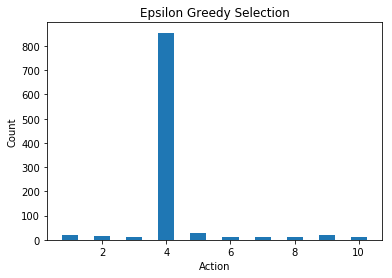

In [34]:
#print(action_counter_array)

ep_greedy_average_value_fn,ep_greedy_rewards,ep_greedy_actions = perform_epsilon_greedy_multiarm_bandit(epsilon=0.1)


plot.title("Epsilon Greedy Selection")
plot.bar(range(1,tot_arms+1),ep_greedy_actions,width =0.5)
plot.xlabel('Action')
plot.ylabel('Count')

In [35]:
print(np.mean(ep_greedy_rewards))

332.4


Text(0, 0.5, 'Count')

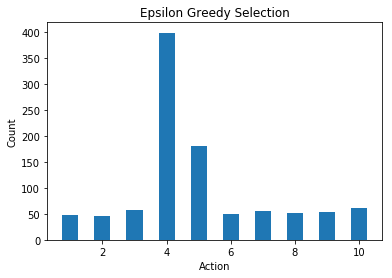

In [41]:
ep_greedy_average_value_fn,ep_greedy_rewards,ep_greedy_actions = perform_epsilon_greedy_multiarm_bandit(epsilon=0.5)


plot.title("Epsilon Greedy Selection")
plot.bar(range(1,tot_arms+1),ep_greedy_actions,width =0.5)
plot.xlabel('Action')
plot.ylabel('Count')

In [42]:
print(np.mean(ep_greedy_rewards))

239.5


Text(0, 0.5, 'Count')

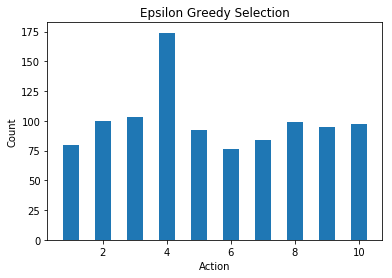

In [43]:
ep_greedy_average_value_fn,ep_greedy_rewards,ep_greedy_actions = perform_epsilon_greedy_multiarm_bandit(epsilon=0.9)


plot.title("Epsilon Greedy Selection")
plot.bar(range(1,tot_arms+1),ep_greedy_actions,width =0.5)
plot.xlabel('Action')
plot.ylabel('Count')

In [44]:
print(np.mean(ep_greedy_rewards))

129.13


Text(0, 0.5, 'Count')

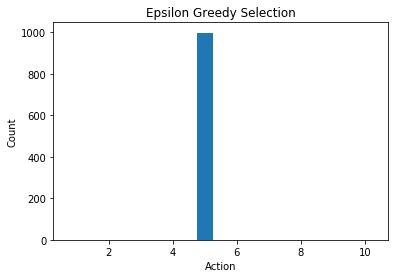

In [45]:
ep_greedy_average_value_fn,ep_greedy_rewards,ep_greedy_actions = perform_epsilon_greedy_multiarm_bandit(epsilon=0.0)


plot.title("Epsilon Greedy Selection")
plot.bar(range(1,tot_arms+1),ep_greedy_actions,width =0.5)
plot.xlabel('Action')
plot.ylabel('Count')